In [1]:
import sys
sys.path.append("../code/pkg/")
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from data import data
from feature_extraction import feature_extraction as fe2
from social_agent import social_agent


from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import *
from sklearn import svm
from scipy import interp
from itertools import cycle

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import platform
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

import time
from scipy.stats import randint as sp_randint
import seaborn as sns

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


from operator import itemgetter

from tabulate import tabulate

from hyperband import HyperbandSearchCV
from sklearn.preprocessing import LabelBinarizer

In [3]:
l=logging.basicConfig(level=logging.INFO, format='%(levelname)s: file[%(name)s] line number[%(lineno)d]: %(message)s')
my_data=data(log=logging)

fe=fe2(log=logging)

sa = social_agent(log=logging)
valence_values=['interest','alarm', 'confusion', 'understanding', 'frustration', 'relief',
       'sorrow', 'joy', 'anger', 'gratitude', 'fear', 'hope', 'boredom',
       'surprise', 'disgust', 'desire']

INFO: file[root] line number[35]: Init Data
INFO: file[root] line number[37]: feature extraction new instance
INFO: file[root] line number[76]: social agent new instance
INFO: file[root] line number[35]: Init Data


In [4]:
def get_vectors(table):
    val=[]
    y=[]
    for d in table:
        val.append(sa.generate_vector(l5=fe.extend_5(df=d),
                   l11=fe.high_strenght_11(df=d),
                   l12=fe.low_strenght_12(df=d)))
        y.append(fe.get_labels(df_list=table))
    return val, y

In [13]:
x1=[]
y1=[]
datasets=[]
my_data.read_main_data()
for v in valence_values:
    d,y=my_data.get_subset_w_y(affect=v, mutuallyExclusive=False)
    x2=[]
    y2=[]
    for datagrams in d:
        if isinstance(datagrams , pd.Series):
            continue
        
        x2.append(sa.generate_vector(l1=fe.extend_1(df=datagrams),
                                     l3=fe.extend_3(df=datagrams),
                                     l5=fe.extend_5(df=datagrams),
                                     l6=fe.extend_6(df=datagrams),
                                     l8=fe.extend_8(df=datagrams),
                                     l9=fe.extend_9(df=datagrams),
                                     l11=fe.high_strenght_11(df=datagrams),
                                     l12=fe.low_strenght_12(df=datagrams),
                                     l18=fe.extend_18(df=datagrams)))
        y2.append(y)
        
        
    x1.append(x2)
    y1.append(y)
    

In [29]:
# Now convert labels
y=[]
X=[]
for xt,yt in zip(x1,y1):
    # Valences
    for xxt,yyt in zip(xt,yt):
        # samples
        X.append(xxt)
        y.append(my_data.convert_binary(yt))

In [30]:
y=np.asarray(y)
y.shape

(4500, 16)

In [31]:
X=np.asarray(X)
X.shape

(4500, 9)

In [32]:
n_classes = y.shape[1]

In [33]:
n_classes

16

In [56]:
# shuffle and split training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


random_state = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
'''classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', 
                                         max_iter=10000,
                                         probability=True,
                                         gamma='auto',
                                 random_state=random_state))
'''
#classifier =tree.RandomForestClassifier()
'''classifier = RandomForestClassifier(class_weight = 'balanced',
                                 n_estimators=100,
                                 max_depth=46,
                                 min_samples_leaf=32,
                                 max_features='auto',
                                 min_samples_split=4,
                                 criterion='gini',
                                 oob_score=True,
                                 verbose=1
                                )
'''
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
classifier= KNeighborsClassifier(17)
classifier.fit(X_train, y_train)
estimator=SelectFromModel(classifier)
y_score = classifier.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


In [57]:
cross_val_score(classifier,X_test,y_test, scoring= 'accuracy')

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.04666667, 0.03666667, 0.04666667])

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


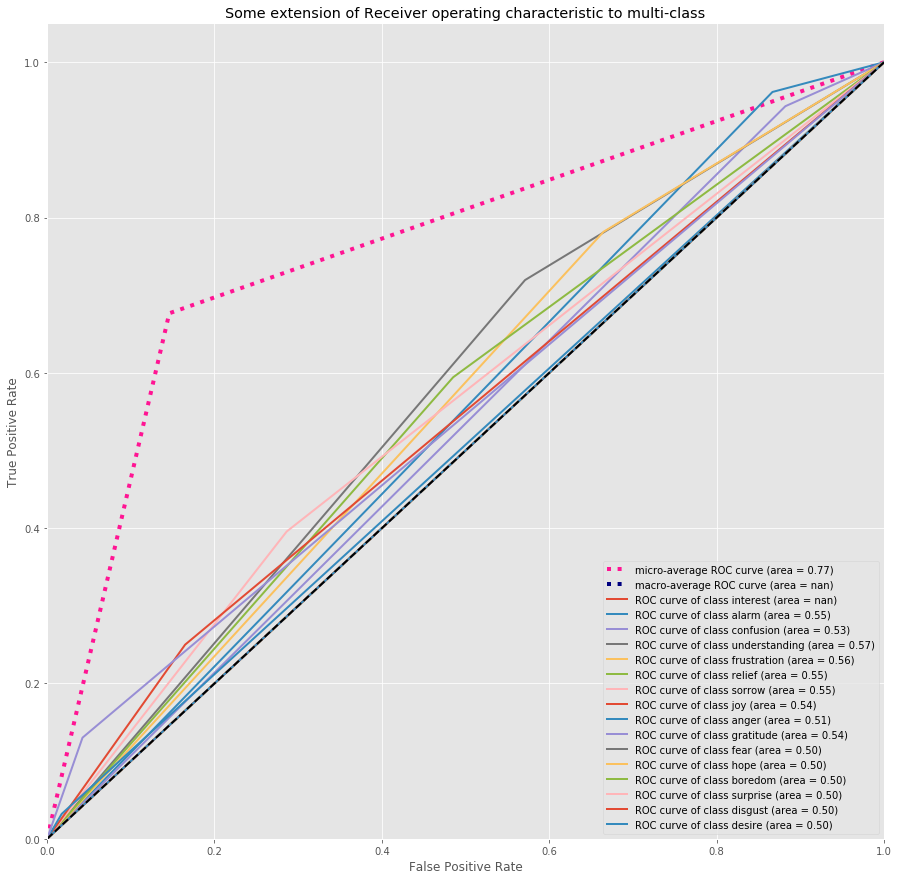

In [58]:
lw=2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(15,15))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(my_data.valence_values[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="best")
plt.show()

In [66]:
score = classifier.score(X_test, y_test)
Z = classifier.predict_proba(X_test)

In [ ]:
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

In [59]:
def Print_Metrics(model, X_test, y_test):
    print('\nModel performance on the test data set:')

    # print('Train Accuracy.......', accuracy_score(y_train, best_model.predict(X_train)))
    # print('Validate Accuracy....', accuracy_score(y_valid, best_model.predict(X_valid)))

    y_predict_test  = model.predict(X_test)
    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    accuracy_test2  = model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test, average='samples')
    precision_test  = precision_score(y_test, y_predict_test, average='samples')
    precision_test2 = metrics.precision_score(y_test, y_predict_test, average='samples')
    recall_test     = recall_score(y_test, y_predict_test, average='samples')
    #auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
    #test_auc       = h2o.get_model("best_rf").model_performance(test_data=test).auc()
    #print('Best model performance based on auc: ', test_auc)
    
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               #["AUC",       auc_test]
             ]

    print(tabulate(table, header, tablefmt="fancy_grid"))

In [60]:
Print_Metrics(classifier, X_test, y_test)


Model performance on the test data set:
╒═══════════╤════════════╕
│ Metric    │       Test │
╞═══════════╪════════════╡
│ logloss   │ 74.1749    │
├───────────┼────────────┤
│ accuracy  │  0.0544444 │
├───────────┼────────────┤
│ precision │  0.738031  │
├───────────┼────────────┤
│ F1        │  0.67728   │
├───────────┼────────────┤
│ r2        │ -0.261377  │
╘═══════════╧════════════╛


In [142]:
def Plot_predictor_importance(best_model, feature_columns):
    feature_importances = classifier.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importances[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()

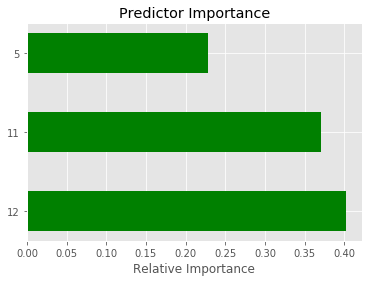

In [143]:
Plot_predictor_importance(classifier, ['5','11','12'])

In [170]:
estimator = classifier.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator,
                feature_names=['1','2','3'],
                filled=True,
                rounded=True)
import os
os.system('dot -Tpng tree.dot -o tree.png')

32512

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [40]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

ValueError: query data dimension must match training data dimension

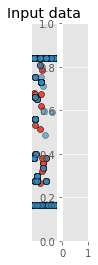

In [49]:
for ds_cnt, ds in enumerate([1]):
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(1, len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1],
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1],  alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(1, len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        #ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
        #           edgecolors='k')
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                   edgecolors='k')
        # Plot the testing points
        #ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
        #           edgecolors='k', alpha=0.6)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()